In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geonomics as gnx
import evodoodle as evo

NOTE: Module 'pykrige' not found. Yosemite demo 3d plots cannot be produced.
pygame 2.6.1 (SDL 2.30.7, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


### 1. Draw your own landscape

In [4]:

# Draw your landscape carrying capacity
# When you run this chunk a pop-up will appear where you can draw on your own landscape
# Note: d sets the dimensions of your square landscape in terms of the number of cells
population_size = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [5]:
# Draw your landscape connectivity
connectivity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [6]:

# Draw your environment for local adaptation
environment = evo.draw_landscape(d = 10)


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [ ]:
%matplotlib inline
# You can plot all your landscapes using plot_landscapes()
evo.plot_landscapes(population_size, connectivity, environment)

In [ ]:
# If you want to change something, you can edit your landscapes using the edit_landscape() function (uncomment the line below)
# environment = evo.edit_landscape(environment)

In [ ]:

# Finally, you can optionally save your landscapes
np.savetxt('population_size.csv', population_size, delimiter=',')
np.savetxt('connectivity.csv', connectivity, delimiter=',')
np.savetxt('environment.csv', environment, delimiter=',')

# Uncomment these lines to read in landscapes
#population_size = np.loadtxt('population_size.csv', delimiter=',')
#connectivity = np.loadtxt('connectivity.csv', delimiter=',')
#environment = np.loadtxt('environment.csv', delimiter=',')

### 2. Play out evolution across your landscape

In [7]:
# To define the parameters of our model for Geonomics we need to have a parameters dictionary
# Evodoodle comes with an example parameters dictionary to start with:
params = evo.example_params()

# %%
# You can also create your own Geonomics parameters file by running gnx.make_parameters_file()
# Here we call this file "example_parameters" and it will automatically be saved to our working directory
gnx.make_parameters_file("example_parameters")
# You can manually edit this file to change the simulation parameters, just note that the landscape layers will be overwritten when we create our custom landscapes, so best to leave that section of the parameters alone

# You can then load your parameters python dictionary
from example_parameters import params
print(params)

# But for now we will use the example parameters
params = evo.example_params()

{'landscape': {'main': {'dim': (20, 20), 'res': (1, 1), 'ulc': (0, 0), 'prj': None}, 'layers': {'lyr_0': {'init': {'random': {'n_pts': 500, 'interp_method': 'linear'}}}}}, 'comm': {'species': {'spp_0': {'init': {'N': 250, 'K_layer': 'lyr_0', 'K_factor': 1}, 'mating': {'repro_age': 0, 'sex': False, 'sex_ratio': 1.0, 'R': 0.5, 'b': 0.2, 'n_births_distr_lambda': 1, 'n_births_fixed': True, 'mating_radius': 10, 'choose_nearest_mate': False, 'inverse_dist_mating': False}, 'mortality': {'max_age': None, 'd_min': 0, 'd_max': 1, 'density_grid_window_width': None}, 'movement': {'move': True, 'direction_distr_mu': 0, 'direction_distr_kappa': 0, 'movement_distance_distr_param1': 0.01, 'movement_distance_distr_param2': 0.5, 'movement_distance_distr': 'lognormal', 'dispersal_distance_distr_param1': -1, 'dispersal_distance_distr_param2': 0.05, 'dispersal_distance_distr': 'lognormal'}, 'gen_arch': {'gen_arch_file': None, 'L': 100, 'start_p_fixed': 0.5, 'start_neut_zero': False, 'mu_neut': 0, 'mu_delet

In [8]:

# Start model
mod = evo.init_mod(params, population_size, connectivity, environment)



MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=320	(births=95	deaths=275)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=294	(births=73	deaths=99)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=276	(births=47	deaths=65)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=276	(births=56	deaths=56)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=252	(births=54	deaths=78)

	........................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=36
	species: spp_0                         N=175	(births=29	deaths=14)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=174	(births=28	deaths=29)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=181	(births=41	deaths=34)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=185	(births=45	deaths=41)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=175	(births=46	deaths=56)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=182	(births=31	deaths=24)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=42
	species: spp_0                         N=186	(births=34	deaths=30)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=174	(births=32	deaths=44)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=177	(births=34	deaths=31)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=165	(births=30	deaths=42)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=168	(births=35	deaths=32)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=165	(births=30	deaths=33)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):


burn:	it=-1:	t=48
	species: spp_0                         N=173	(births=32	deaths=24)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=171	(births=32	deaths=34)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=161	(births=24	deaths=34)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=170	(births=35	deaths=26)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=160	(births=34	deaths=44)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0                         N=157	(births=30	deaths=33)

	........................................................................
burn:	it=-1:	t=54
	species: spp_0 

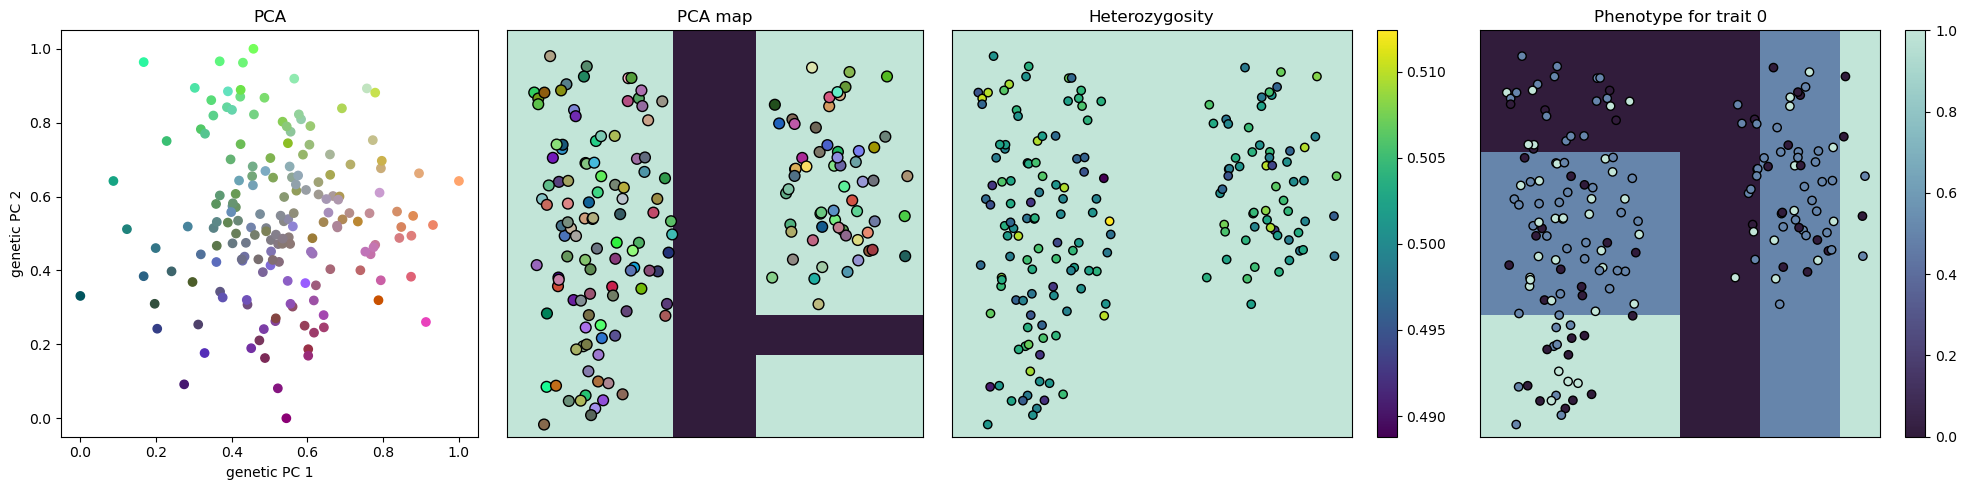

In [9]:
# Plot initial model (no selection has occurred yet)
evo.plot_popgen(mod)

In [10]:
# Run the model for 100 steps and collect statistics every 10 time steps
stats = evo.stats_walk(mod, t=100, inc=10)



main:	it=-1:	t=0
	species: spp_0                         N=164	(births=23	deaths=27)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=157	(births=37	deaths=44)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=159	(births=29	deaths=27)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=153	(births=28	deaths=34)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=162	(births=33	deaths=24)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=171	(births=31	deaths=22)

	........................................................................
main:	it=-1:	t=6
	species: spp_0      

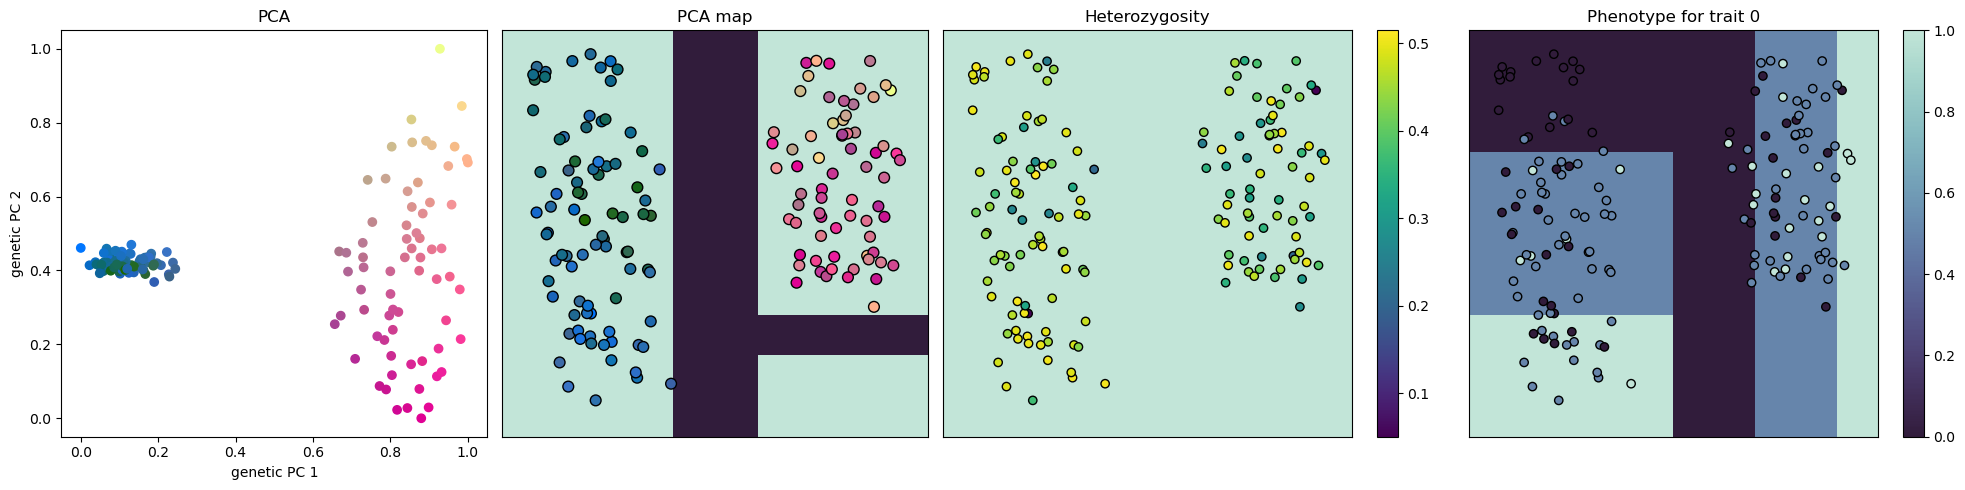

In [11]:

# Plot the results
evo.plot_popgen(mod)

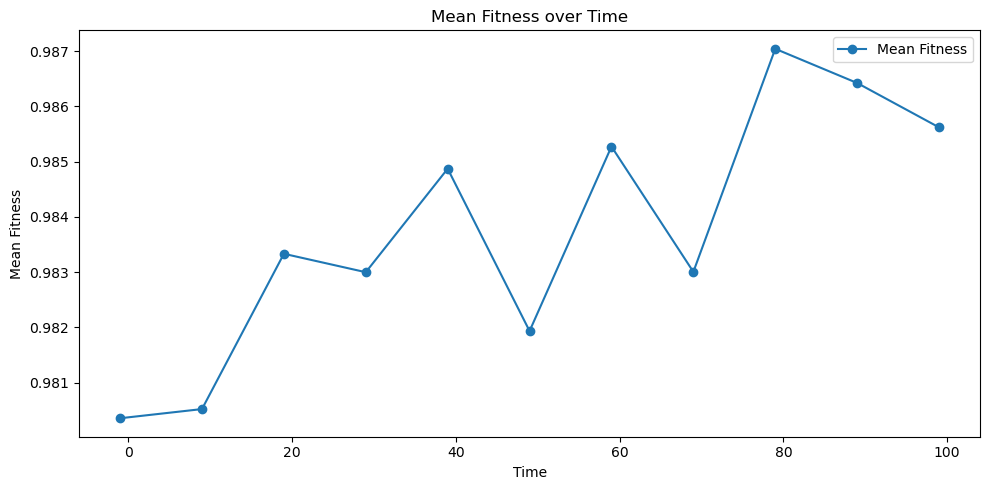

In [18]:
# Plot fitness over time
evo.plot_fitness(stats)

In [19]:

# Run the model for another 100 steps
stats2 = evo.stats_walk(mod, t=100, inc=10)



main:	it=-1:	t=100
	species: spp_0                         N=151	(births=30	deaths=32)

	........................................................................
main:	it=-1:	t=101
	species: spp_0                         N=165	(births=29	deaths=15)

	........................................................................
main:	it=-1:	t=102
	species: spp_0                         N=169	(births=33	deaths=29)

	........................................................................
main:	it=-1:	t=103
	species: spp_0                         N=167	(births=30	deaths=32)

	........................................................................
main:	it=-1:	t=104
	species: spp_0                         N=171	(births=31	deaths=27)

	........................................................................
main:	it=-1:	t=105
	species: spp_0                         N=183	(births=34	deaths=22)

	........................................................................
main:	it=-1:	t=106
	specie

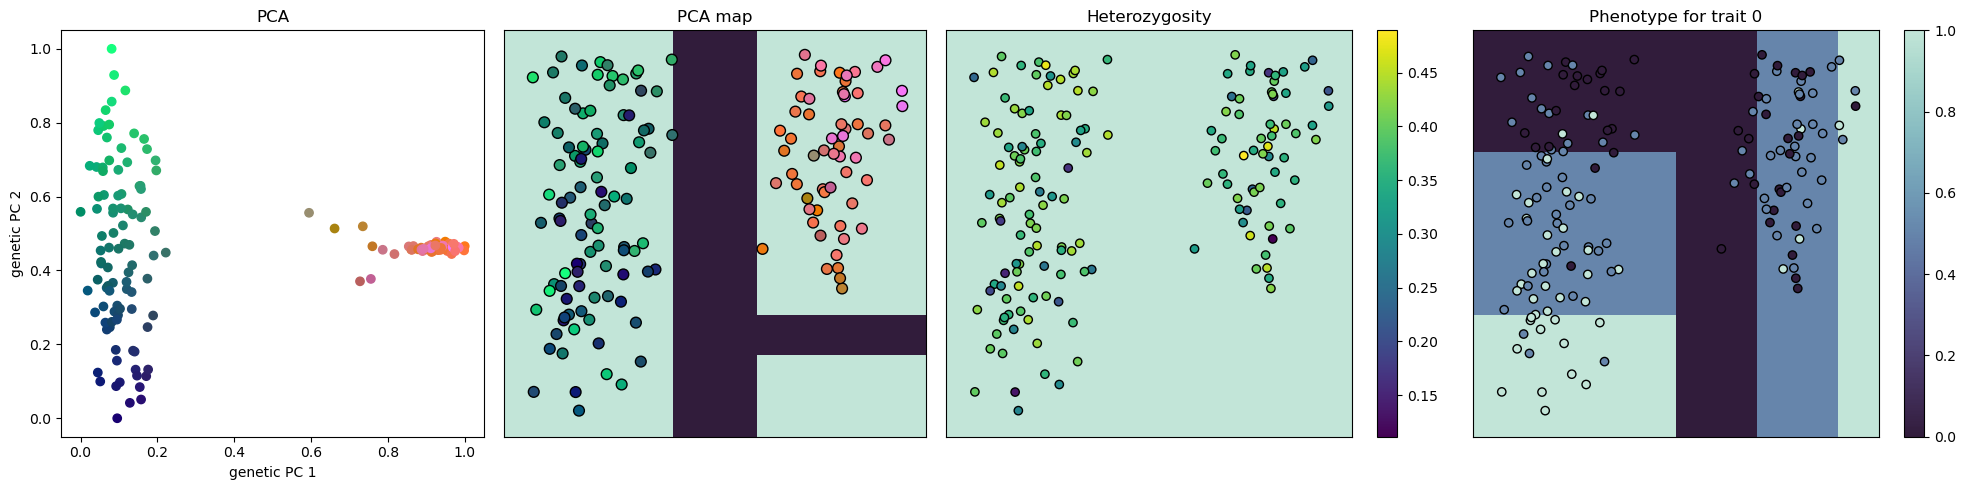

In [20]:

evo.plot_popgen(mod)

In [25]:
stats

{'Nt': [153, 169, 162, 121, 131, 162, 159, 148, 166, 186, 155],
 'Heterozygosity': [0.42390326797385625,
  0.42161656804733727,
  0.41890679012345683,
  0.39510413223140495,
  0.3961893129770993,
  0.3867586419753086,
  0.3810088050314465,
  0.3755844594594595,
  0.3760584337349397,
  0.3757086021505376,
  0.36424193548387096],
 'Mean Fitness': [0.9856209150326798,
  0.9850591715976331,
  0.9825617283950616,
  0.9847107438016527,
  0.9856870229007632,
  0.9839506172839505,
  0.9858490566037732,
  0.984966216216216,
  0.9887048192771081,
  0.9861559139784943,
  0.9872580645161289],
 'Time': [99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199]}

In [22]:
# Combine stats dictionaries
stats.update(stats2)

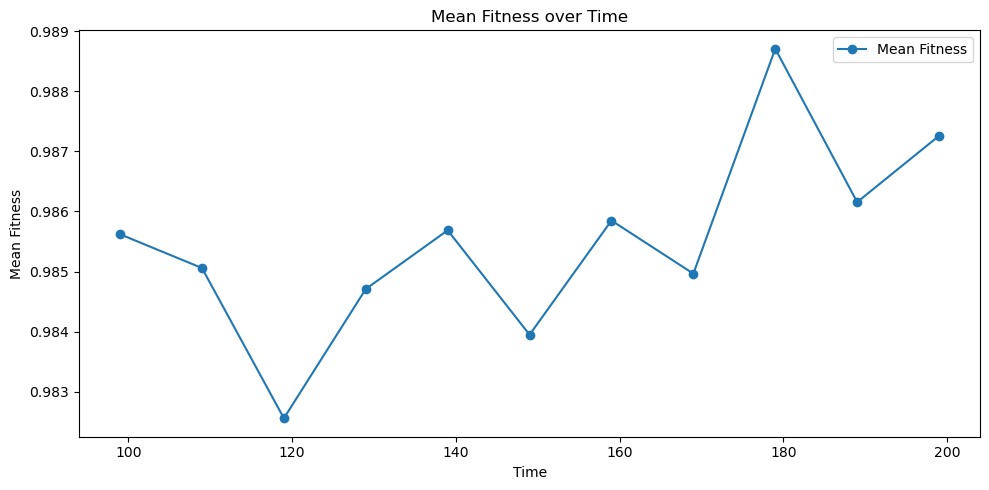

In [24]:
# Plot fitness over time
evo.plot_fitness(stats)

### Challenges

Here are a set of challenges to demonstrate the power and application of simulations to answering real world questions. Some of them will ask you to come up with new simulations of your own. These simulations are stochastic, so make sure to run your simulations multiple times (for the sake of these exercises, 3 times is fine, but if this was a real analysis you would likely want to run at least 10 iterations).

1. You are consulting with a conservation organization that is trying to decide whether to build (Option 1) a large, connected, single preserve or (Option 2) several, smaller, disconnected preserves. Design a simulation (or a set of simulations) to help them make their decision. Bonus challenge: try and simulate one scenario where option (1) is best and one scenario where (2) is best (Hint: think about different things you might want to conserve)

2. Wildlife corridors are a popular method for restoring connectivity between areas fragmented by human development, such as roads. Create a simulation (or a pair of simulations) that shows the effect of a wildlife corridor across a hypothetical road on genetic diversity. What happens if the corridor connects two very different environments?

3. Your friend comes to you super excited because they just analyzed their landscape genetics data on hedgehogs and found a super clear gradient in PC values that aligns with a gradient in temperature. They tell you that they think this is an indication that hedgehogs are locally adapted to temperature. What do you think? Can you come up with a simulation to show your friend what else could be causing this pattern?


4. So far, we have only used the evodoodle default simulation parameters; this means that for all of our simulations, we have used the same underlying species parameters (e.g., number of offspring, longevity, etc.). What are some species parameters that might be important to test? Pick one of the scenarios above and describe two parameters you might want to evaluate in your simulations. 
Some example parameters you might want to consider:
- Movement/dispersal rates
- Longevity (i.e., maximum age)
- Number of offspring per mating event
- Mutation rates
- Selection strength
- Mating radius
- Mutation rates
Explain why you picked these parameters and hypothesize what you might expect to see if you changed them. Your hypothesis does not have to be "correct", it just has to be testable and justified.